In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
#LOAD DATA
Test = pd.read_csv('housing_test_clean.csv')
Train = pd.read_csv('housing_train_clean.csv')

In [22]:
X_train=Train.copy()
X_train.drop(['SalePrice'], axis=1, inplace=True)
Y_train=Train[['SalePrice']].copy()
X_test=Test.copy()
X_test.drop(['SalePrice'], axis=1, inplace=True)
Y_test=Test[['SalePrice']].copy()

In [23]:
#CONVERT TO NUMPY
X_train=X_train.values
Y_train=Y_train.values.reshape(-1)
X_test=X_test.values
Y_test=Y_test.values.reshape(-1)

In [24]:
scaler=MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [25]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

# build a KNN regressor
KNNmodel = KNeighborsRegressor(n_neighbors = 5)
# train the KNN regressor
KNNmodel.fit(X_train_s, Y_train)
# test the KNN regressor
Y_test_pred = KNNmodel.predict(X_test_s)
# Calculate errors

KNNMSE = np.mean((Y_test - Y_test_pred)**2)
KNNMAE = np.mean(np.abs(Y_test - Y_test_pred))
KNNMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE= 1427902412.5182247
KNNMAE= 22995.33351658515
KNNMAPE= 0.129753451276978


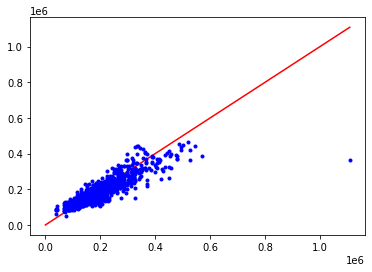

In [12]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

In [28]:
#LINEARREGRESSION
from sklearn.linear_model import LinearRegression

Linearmodel = LinearRegression()
Linearmodel.fit(X_train_s, Y_train)
# test the regressor
Y_test_pred = Linearmodel.predict(X_test_s)
# Calculate errors

LMMSE = np.mean((Y_test - Y_test_pred)**2)
LMMAE = np.mean(np.abs(Y_test - Y_test_pred))
LMMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('LMMSE=', LMMSE)
print('LMMAE=', LMMAE)
print('LMMAPE=', LMMAPE)

LMMSE= 3.8781417673388485e+31
LMMAE= 4035445006626580.0
LMMAPE= 30522984595.83681


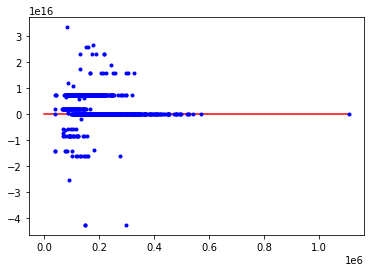

In [27]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

In [15]:
#DECISIONTREE 

from sklearn.tree import DecisionTreeRegressor
Treemodel = DecisionTreeRegressor()
Treemodel.fit(X_train, Y_train)
# test the regressor
Y_test_pred = Treemodel.predict(X_test_s)
# Calculate errors

DTMSE = np.mean((Y_test - Y_test_pred)**2)
DTMAE = np.mean(np.abs(Y_test - Y_test_pred))
DTMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('DTMSE=', DTMSE)
print('DTMAE=', DTMAE)
print('DTMAPE=', DTMAPE)




DTMSE= 22817727283.544144
DTMAE= 128153.66125336647
DTMAPE= 0.6712766856373678


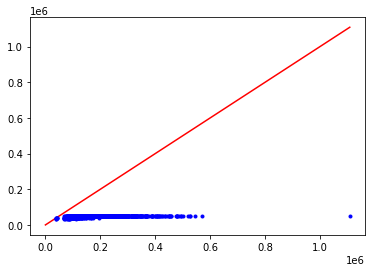

In [16]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

In [17]:
#RANDOMFOREST

from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators=100)
RFmodel.fit(X_train, Y_train)
Y_test_pred = RFmodel.predict(X_test)
RFmodel.score(X_train, Y_train)
RFmodel.score(X_test, Y_test)

RFMSE = np.mean((Y_test - Y_test_pred)**2)
RFMAE = np.mean(np.abs(Y_test - Y_test_pred))
RFMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('RFMSE=', RFMSE)
print('RFMAE=', RFMAE)
print('RFMAPE=', RFMAPE)

RFMSE= 584689830.5908341
RFMAE= 10864.28582893662
RFMAPE= 0.06217387332234633


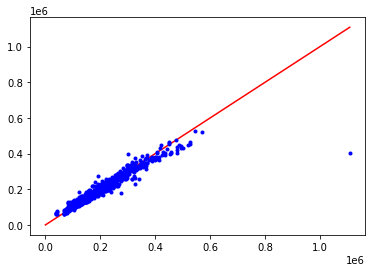

In [18]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

In [19]:
from tabulate import tabulate
table = [['', 'KNNRegressor', 'LinearRegression', 'DecisionTree', 'RandomForest'], 
         ['MSE', KNNMSE, LMMSE, DTMSE, RFMSE], 
         ['MAE', KNNMAE, LMMAE, DTMAE, RFMAE], 
         ['MAPE', KNNMAPE, LMMAPE, DTMAPE, RFMAPE]]

print(tabulate(table))




----  ------------------  ---------------------  ------------------  -------------------
      KNNRegressor        LinearRegression       DecisionTree        RandomForest
MSE   1427902412.5182247  8.834341349345797e+24  22817727283.544144  584689830.5908341
MAE   22995.33351658515   1663652608646.125      128153.66125336647  10864.28582893662
MAPE  0.129753451276978   11995678.048670484     0.6712766856373678  0.06217387332234633
----  ------------------  ---------------------  ------------------  -------------------
